In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [28]:
Data=pd.read_csv('data/Data-train.csv',index_col=0)
Data.head()

,productID,brandID,attribute1,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel,sales
0,6,24,3.0,100.0,2418.0,278.97561,216.768293,56.928571,5,31.694915,0.338983,2.929825,0.431034,0.269841,2.120690,3.079365,1.943396,82
1,47,25,4.0,100.0,1723.0,79.90000,59.233333,49.285714,6,30.652174,0.217391,2.928571,0.604651,0.191489,2.302326,2.446809,2.093023,48
2,6,24,3.0,100.0,1666.0,298.00000,214.410714,48.857143,4,31.370370,0.148148,2.941176,0.519231,0.357143,2.153846,2.839286,2.104167,56
3,48,25,3.0,80.0,386.0,69.90000,40.664706,19.714286,4,32.222222,0.333333,3.111111,0.333333,0.272727,2.444444,2.700000,2.888889,17
4,47,25,4.0,100.0,1419.0,79.90000,58.703279,66.214286,4,31.020408,0.183673,2.978723,0.425532,0.218182,2.468085,2.490909,2.042553,61


In [13]:
StandardScaler().fit_transform(Data[['sales']])

array([[ 0.25780837],
       [-0.08205438],
       [-0.00208667],
       ...,
       [-0.22199786],
       [-0.34194942],
       [-0.47189694]])

In [64]:
#Correlation Matrix
Data_corr = Data.corr()
Data_corr

,productID,brandID,attribute1,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel,sales
productID,1.000000,0.190414,0.051820,0.018744,-0.082898,0.074792,0.091497,-0.079811,-0.002343,0.084663,-0.019827,0.039869,0.043402,0.041966,-0.034579,-0.017999,0.028973,-0.061266
brandID,0.190414,1.000000,0.039658,-0.031100,0.029776,0.242871,0.147845,0.014146,0.018988,-0.096038,0.039874,0.067072,-0.078445,0.069359,-0.039329,0.117087,-0.062888,0.005926
attribute1,0.051820,0.039658,1.000000,0.643106,0.049304,0.360263,0.377507,0.033059,0.002471,-0.036177,-0.242693,0.143131,0.014209,0.054762,-0.125843,0.108605,-0.077623,0.029665
attribute2,0.018744,-0.031100,0.643106,1.000000,0.168479,0.369373,0.374981,0.147638,0.006264,-0.012496,-0.213611,0.105395,0.039045,0.077590,-0.109003,0.090240,-0.076800,0.117661
clickVolume,-0.082898,0.029776,0.049304,0.168479,1.000000,0.167440,0.114934,0.723921,-0.036779,-0.054060,-0.005997,-0.062936,-0.023115,0.006499,0.012437,-0.041505,0.027674,0.809854
avgOriginalUnitPrice,0.074792,0.242871,0.360263,0.369373,0.167440,1.000000,0.899895,0.090311,0.013583,0.037566,-0.209028,0.170931,0.020077,0.164956,-0.246630,0.175116,-0.125518,0.058788
avgFinalUnitPrice,0.091497,0.147845,0.377507,0.374981,0.114934,0.899895,1.000000,0.061164,0.009537,0.070535,-0.176845,0.129265,0.023294,0.110175,-0.246601,0.194259,-0.118951,-0.001668
ma14SalesVolume,-0.079811,0.014146,0.033059,0.147638,0.723921,0.090311,0.061164,1.000000,0.029922,-0.058149,-0.000779,-0.050351,-0.042011,-0.008243,0.005106,-0.056549,0.006853,0.691496
weekday,-0.002343,0.018988,0.002471,0.006264,-0.036779,0.013583,0.009537,0.029922,1.000000,0.016724,-0.028642,0.009959,0.003746,0.019681,0.002240,-0.002226,-0.058451,-0.016449
meanAge,0.084663,-0.096038,-0.036177,-0.012496,-0.054060,0.037566,0.070535,-0.058149,0.016724,1.000000,0.054092,0.065548,0.462438,0.040562,-0.068855,0.077794,-0.075656,-0.051563


Based on above matrix, clickVolume, ma14SalesVolume are the ones that are highly correlated with Sales

Text(0, 0.5, 'ma14SalesVolume')

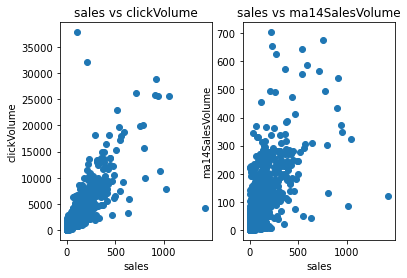

In [65]:
#Scatterplot b/w sales and highly correlated parameters
# %matplotlib inline
# print('The scatter plot b/w sales and ClickVolume')
# Data.plot.scatter('sales','clickVolume')
# plt.show()

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(Data['sales'],Data['clickVolume'])
ax2.scatter(Data['sales'],Data['ma14SalesVolume'])

ax1.set_title('sales vs clickVolume')
ax1.set_xlabel('sales')
ax1.set_ylabel('clickVolume')

ax2.set_title('sales vs ma14SalesVolume')
ax2.set_xlabel('sales')
ax2.set_ylabel('ma14SalesVolume')

In [68]:
#Data processing function
def data_process():
    #Transforming required variables from numerical to categorical
    Data.productID = Data.productID.astype('category')
    Data.brandID = Data.brandID.astype('category')
    Data.weekday = Data.weekday.astype('category')
    Data.attribute1 = Data.attribute1.astype('category')

    DTX = pd.get_dummies(Data.drop(['sales'], axis=1),drop_first=False)
    DTy = Data.sales

    #Splitting data in training and test dataset
    DTX_train,DTX_test,DTy_train,DTy_test = train_test_split(DTX,DTy, test_size=0.2,random_state=20)


In [69]:
DTX.head(100)

,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,brandID_33,attribute1_2.0,attribute1_3.0,attribute1_4.0,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,100.0,2418.0,278.975610,216.768293,56.928571,31.694915,0.338983,2.929825,0.431034,0.269841,...,0,0,1,0,0,0,0,1,0,0
1,100.0,1723.0,79.900000,59.233333,49.285714,30.652174,0.217391,2.928571,0.604651,0.191489,...,0,0,0,1,0,0,0,0,1,0
2,100.0,1666.0,298.000000,214.410714,48.857143,31.370370,0.148148,2.941176,0.519231,0.357143,...,0,0,1,0,0,0,1,0,0,0
3,80.0,386.0,69.900000,40.664706,19.714286,32.222222,0.333333,3.111111,0.333333,0.272727,...,0,0,1,0,0,0,1,0,0,0
4,100.0,1419.0,79.900000,58.703279,66.214286,31.020408,0.183673,2.978723,0.425532,0.218182,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.0,2869.0,138.875585,72.899331,135.500000,30.694444,0.416667,3.188406,0.537313,0.379747,...,0,0,1,0,0,0,0,1,0,0
96,100.0,819.0,240.000000,191.428571,8.928571,35.538462,0.076923,3.181818,0.538462,0.307692,...,0,0,1,0,1,0,0,0,0,0
97,50.0,2369.0,69.700000,59.460000,37.285714,30.711111,0.400000,2.804878,0.325581,0.080000,...,0,1,0,0,0,0,0,1,0,0
98,100.0,4991.0,147.797980,127.240404,68.357143,31.717647,0.321429,2.960000,0.481481,0.260417,...,0,0,0,1,1,0,0,0,0,0


In [70]:
DTy

0        82
1        48
2        56
3        17
4        61
       ... 
2486    137
2487      1
2488     34
2489     22
2490      9
Name: sales, Length: 2491, dtype: int64